## Question 1

The figure below shows two positive points (purple squares) and two negative points (green circles): 

<img src="https://d396qusza40orc.cloudfront.net/mmds/images/otc_svm1.gif" style="float:left">

<br clear="all">

That is, the training data set consists of:

- (x1,y1) = ((5,4),+1)
- (x2,y2) = ((8,3),+1)
- (x3,y3) = ((7,2),-1)
- (x4,y4) = ((3,3),-1)

Our goal is to find the maximum-margin linear classifier for this data. In easy cases, the shortest line between a positive and negative point has a perpendicular bisector that separates the points. If so, the perpendicular bisector is surely the maximum-margin separator. Alas, in this case, the closest pair of positive and negative points, x2 and x3, have a perpendicular bisector that misclassifies x1 as negative, so that won't work.

The next-best possibility is that we can find a pair of points on one side (i.e., either two positive or two negative points) such that a line parallel to the line through these points is the maximum-margin separator. In these cases, the limit to how far from the two points the parallel line can get is determined by the closest (to the line between the two points) of the points on the other side. For our simple data set, this situation holds.

Consider all possibilities for boundaries of this type, and express the boundary as w.x+b=0, such that w.x+b≥1 for positive points x and w.x+b≤-1 for negative points x. Assuming that w = (w1,w2), identify in the list below the true statement about one of w1, w2, and b.

<ol>
<li>w2 = 8/5
<li>w2 = 10/3
<li>b = -15/2
<li>w1 = 2/5
</ol>

In [8]:
import math
import numpy as np
from numpy import linalg as LA

data = np.array([[5, 4, 1],
                 [8, 3, 1],
                 [7, 2, -1],
                 [3, 3, -1]])

# Pick the three support vectors: The line through points (5, 4) and (8, 3) is the best line.
# The third support vector is then (7, 2), which is the closest point to this line

# We have the following constraints

#5u + 4v + b >= 1
#8u + 3v + b >= 1
#3u + 3v + b <= -1

# Solve the linear equations
p = np.array([(5, 4, 1),(8, 3, 1), (7, 2, 1)])
r = np.array([1, 1, -1])
x = np.linalg.solve(p, r)

print("1:", x[1] == 8/5)
print("2:", x[1] == 10/3)
print("3:", x[2] == -15/2)
print("4:", x[0] == 2/5)

1: False
2: False
3: True
4: False


## Question 2

Consider the following training set of 16 points. The eight purple squares are positive examples, and the eight green circles are negative examples.

<img src="https://d396qusza40orc.cloudfront.net/mmds/images/newsvm4.gif" style="float:left"/>
<br clear="all"/>

We propose to use the diagonal line with slope +1 and intercept +2 as a decision boundary, with positive examples above and negative examples below. However, like any linear boundary for this training set, some examples are misclassified. We can measure the goodness of the boundary by computing all the slack variables that exceed 0, and then using them in one of several objective functions. In this problem, we shall only concern ourselves with computing the slack variables, not an objective function.

To be specific, suppose the boundary is written in the form w.x+b=0, where w = (-1,1) and b = -2. Note that we can scale the three numbers involved as we wish, and so doing changes the margin around the boundary. However, we want to consider this specific boundary and margin.

Determine the slack for each of the 16 points. Then, identify the correct statement in the list below.

<ol>
<li>The slack for (7,8) is 0.
<li>The slack for (1,4) is 0.
<li>The slack for (3,4) is 2.
<li>The slack for (3,6) is 2.
</ol>

1: False
2: False
3: True
4: False


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


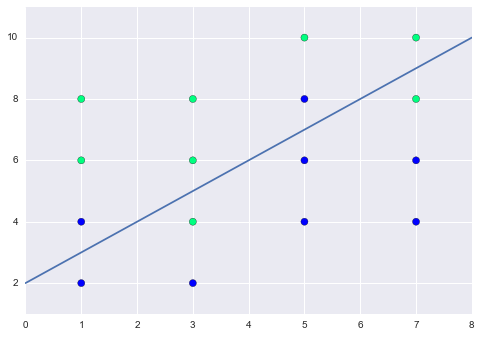

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

def calculate_slack(point, w, b, y):
    # Distance from line L
    d = point[0] * w[0] + point[1] * w[1] + b
    # Confidence
    c = d * y
    # if correctly classified - return 0,
    # else - return the penalty (+1) + the distance from the line L
    return 0 if c >= 0 else abs(c) + penalty

def decision_boundary(x):
    return x + 2

points = np.array([
        [5, 10, 1],
        [7, 10, 1],
        [1, 8, 1],
        [3, 8, 1],
        [7, 8, 1],
        [1, 6, 1],
        [3, 6, 1],
        [3, 4, 1],
        [5, 8, -1],
        [5, 6, -1],
        [7, 6, -1],
        [1, 4, -1],
        [5, 4, -1],
        [7, 4, -1],
        [1, 2, -1],
        [3, 2, -1]])

w = np.array([-1, 1])
b = -2
penalty = 1

X_fit = np.linspace(0, 8, 2)[:, np.newaxis]
y_fit = decision_boundary(X_fit)

X, y = points[:,[0,1]], points[:, 2]
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');
plt.plot(X_fit, y_fit)
plt.xlim(0, 8)

print("1:", calculate_slack(X[4], w, b, y[4]) == 0)
print("2:", calculate_slack(X[11], w, b, y[11]) == 0)
print("3:", calculate_slack(X[7], w, b, y[7]) == 2)
print("4:", calculate_slack(X[6], w, b, y[6]) == 2)

## Question 3

Below we see a set of 20 points and a decision tree for classifying the points.

<img src="https://d396qusza40orc.cloudfront.net/mmds/images/otc_gold-small.gif" style="float:left">
<img src="https://d396qusza40orc.cloudfront.net/mmds/images/otc_dectree1.gif" style="float:left">
<br clear="all">
	
To be precise, the 20 points represent (Age,Salary) pairs of people who do or do not buy gold jewelry. Age (appreviated A in the decision tree) is the x-axis, and Salary (S in the tree) is the y-axis. Those that do are represented by gold points, and those that do not by green points. The 10 points of gold-jewelry buyers are:

(28,145), (38,115), (43,83), (50,130), (50,90), (50,60), (50,30), (55,118), (63,88), and (65,140).

The 10 points of those that do not buy gold jewelry are:

(23,40), (25,125), (29,97), (33,22), (35,63), (42,57), (44, 105), (55,63), (55,20), and (64,37).

Some of these points are correctly classified by the decision tree and some are not. Determine the classification of each point, and then indicate in the list below the point that is misclassified.

<ol>
<li>(65,140)
<li>(25,125)
<li>(35,63)
<li>(29,97)
</ol>

In [3]:
def decision_tree(p):
    if p[0] < 45:
        return False if p[1] < 110 else True
    else:
        return False if p[1] < 75 else True
            
data = [(28, 145, 1),
        (38, 115, 1),
        (43, 83, 1), 
        (50, 130, 1), 
        (50, 90, 1),
        (50, 60, 1), 
        (50, 30, 1),
        (55, 118, 1),
        (63, 88, 1),
        (65, 140, 1),
        (23, 40, 0),
        (25, 125, 0),
        (29, 97, 0), 
        (33, 22, 0),
        (35, 63, 0),
        (42, 57, 0),
        (44, 105, 0),
        (55, 63, 0),
        (55, 20, 0),
        (64, 37, 0)]

misclassified = []

for d in data:
    if decision_tree(d) != d[-1]:
        misclassified.append(d[:2])
        
print("1:", (65, 140) in misclassified)
print("2:", (25, 125) in misclassified)
print("3:", (35, 63) in misclassified)
print("4:", (29, 97) in misclassified)

1: False
2: True
3: False
4: False
